<a href="https://colab.research.google.com/github/SanjayN2004/Genarative-AI/blob/main/Liver_Disease_Detection_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
dataset=pd.read_csv('/content/indian_liver_patient.csv')

In [ ]:
#checking the head of our dataset
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
#checking the  info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
#Counting the ocurrence of values of Dataset column
dataset['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [ ]:
#Converting the Binary value of the Dataset column i.e 1 and 2
#to 0 and 1 as our ANN model got confused and the loss function become negative
dataset.loc[dataset['Dataset']==1,'Dataset']=0
dataset.loc[dataset['Dataset']==2,'Dataset']=1
dataset['Dataset'].value_counts()


0    416
1    167
Name: Dataset, dtype: int64

In [ ]:
#For visualising
import seaborn as sns

<Axes: ylabel='count'>

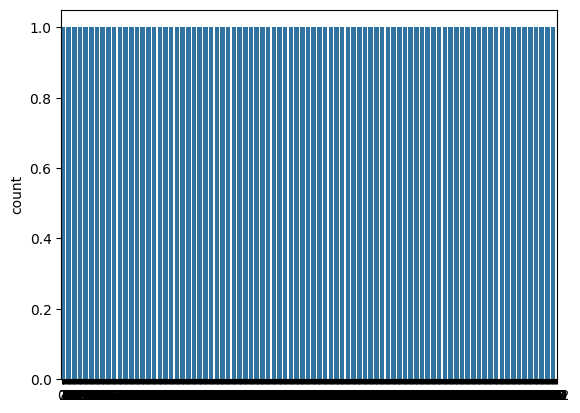

In [ ]:
#Counting the number of occurence of the different values of the Dataset column
sns.countplot(dataset['Dataset'])

<Axes: xlabel='Dataset', ylabel='Total_Protiens'>

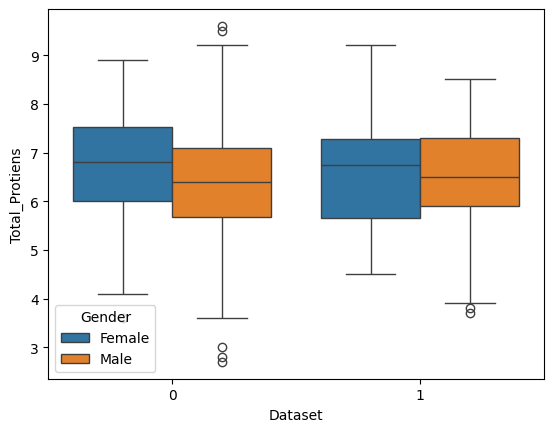

In [ ]:
#Checking the Average of the total proteins vs the Whether the person is liver patient or not.
sns.boxplot(x='Dataset',y='Total_Protiens',hue='Gender',data=dataset)

<Axes: xlabel='Dataset', ylabel='Albumin'>

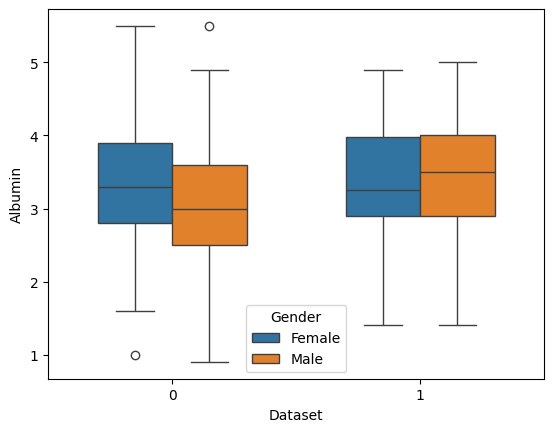

In [ ]:
#Checking the Average of the Age vs the Whether the person is liver patient or not.
sns.boxplot(x='Dataset',y='Albumin',hue='Gender',data=dataset,width=0.6)

<Axes: xlabel='Dataset', ylabel='Albumin'>

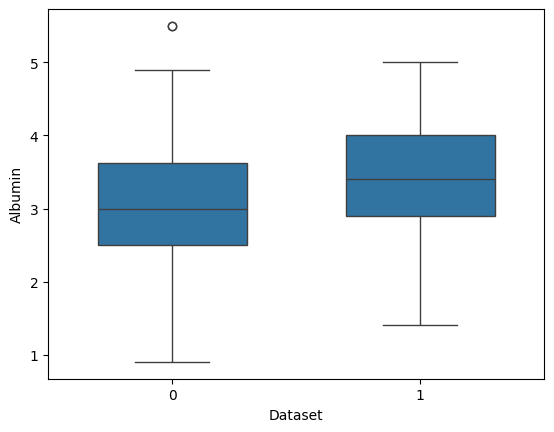

In [ ]:
#Checking the Average of the Albumin vs the Whether the person is liver patient or not.
sns.boxplot(x='Dataset',y='Albumin',data=dataset,width=0.6)

In [ ]:
#Converting the Categorical features

In [ ]:
new_Data=pd.get_dummies(dataset,columns=['Gender'],drop_first=True)

In [ ]:
new_Data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [ ]:
new_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    int64  
 10  Gender_Male                 583 non-null    uint8  
dtypes: float64(5), int64(5), uint8(1)
memory usage: 46.2 KB


<Axes: >

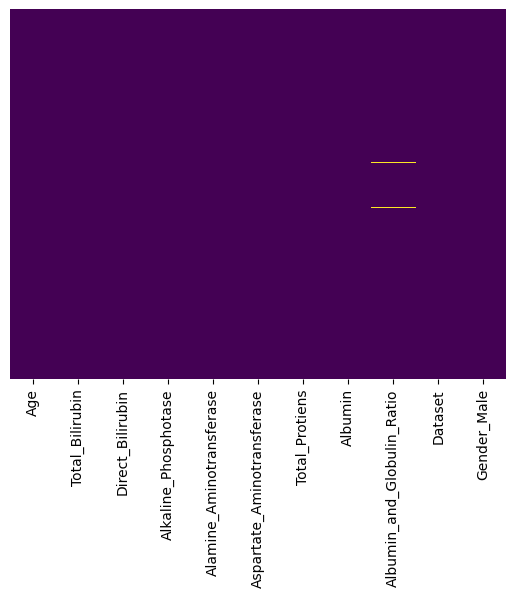

In [ ]:
#Checking for null data
sns.heatmap(new_Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#converting the null value into mean value
def Converter(data):
    if pd.isnull(data):
        return new_Data['Albumin_and_Globulin_Ratio'].mean()
    else:
        return data


In [ ]:
#Applying the Function to column of the dataset that have null values
new_Data['Albumin_and_Globulin_Ratio']=new_Data['Albumin_and_Globulin_Ratio'].apply(Converter)

<Axes: >

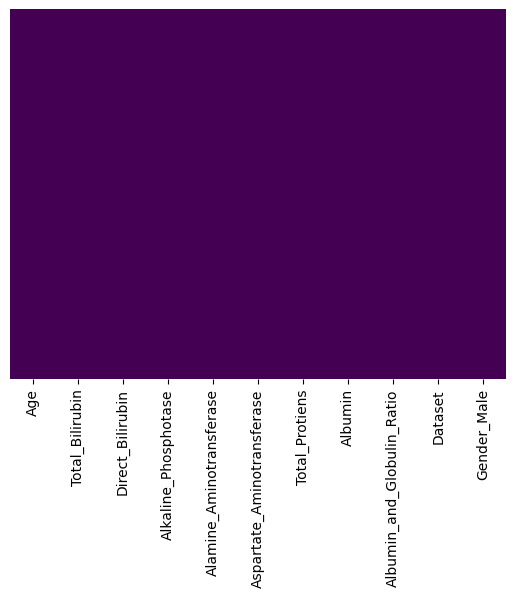

In [ ]:
#Rechecking for null value
sns.heatmap(new_Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Converting the dataset into x and y(target variable)
X=new_Data.drop('Dataset',axis=1)
y=new_Data['Dataset']

In [ ]:
#Dividing the data into training and test set
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
import keras


In [ ]:
#importing the libraries for our ANN Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
#Initialising the model
model=Sequential()

In [ ]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
model.add(Dropout(0.2))

In [ ]:
#new_Data.info()
#adding the second layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.2))

In [ ]:
#adding the output layer
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.add(Dropout(0.2))

In [ ]:
#compiling all the layer together
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Fitting the data to our model
model.fit(X_train,y_train,batch_size=20,epochs=400)

Epoch 1/400
24/24 [==============================] - 1s 3ms/step - loss: 1.6538 - accuracy: 0.3541
Epoch 2/400
24/24 [==============================] - 0s 3ms/step - loss: 1.4924 - accuracy: 0.3541
Epoch 3/400
24/24 [==============================] - 0s 3ms/step - loss: 1.3297 - accuracy: 0.3841
Epoch 4/400
24/24 [==============================] - 0s 3ms/step - loss: 1.7989 - accuracy: 0.3412
Epoch 5/400
24/24 [==============================] - 0s 3ms/step - loss: 1.8360 - accuracy: 0.3605
Epoch 6/400
24/24 [==============================] - 0s 3ms/step - loss: 1.4657 - accuracy: 0.5494
Epoch 7/400
24/24 [==============================] - 0s 4ms/step - loss: 1.3695 - accuracy: 0.6288
Epoch 8/400
24/24 [==============================] - 0s 3ms/step - loss: 1.2578 - accuracy: 0.7039
Epoch 9/400
24/24 [==============================] - 0s 3ms/step - loss: 1.4424 - accuracy: 0.6910
Epoch 10/400
24/24 [==============================] - 0s 3ms/step - loss: 1.3750 - accuracy: 0.7167
Epoch 11/

In [ ]:
#Making Prediction from our model
predictions=model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
#converting the probablitiy obtained using the predict method to the binary output
predictions=(predictions>0.5)


In [ ]:
#Importing the library and Evaluating the performance of our ANN Model on the test set
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
print('Confusion Matrix \n',confusion_matrix(y_test,predictions))

Confusion Matrix 
 [[74  0]
 [43  0]]


In [ ]:
#Printing the Classifcation Report
print('Classification Report \n',classification_report(y_test,predictions))

Classification Report 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77        74
           1       0.00      0.00      0.00        43

    accuracy                           0.63       117
   macro avg       0.32      0.50      0.39       117
weighted avg       0.40      0.63      0.49       117



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Printing the Classifcation Report
print('Accuracy of our mode when applied on test set-',accuracy_score(y_test,predictions))

Accuracy of our mode when applied on test set- 0.6324786324786325
